In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#trying to perm install it
# import os, sys
# from google.colab import drive
# drive.mount('/content/mnt')
# nb_path = '/content/notebooks'
# os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
# sys.path.insert(0, nb_path)  # or append(nb_path)


In [ ]:
!pip install astroNN

#trying to perrm install it --- worled out!
#!pip install --target=$nb_path astroNN

#!pip install get_default_session

     |████████████████████████████████| 9.3 MB 7.5 MB/s 
     |████████████████████████████████| 4.5 MB 39.8 MB/s 
     |████████████████████████████████| 832 kB 43.2 MB/s 
     |████████████████████████████████| 48 kB 6.4 MB/s 
     |████████████████████████████████| 4.0 MB 44.7 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=af943d24d4a84ec5f6da5411e86b1ff2bfff6c5b45c15a2d0a6b059d605cd952
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, Resizing
from tensorflow.keras import utils

import joblib

import h5py

from sklearn.model_selection import train_test_split

#loading the file instead of from the model (which is crashing my computer)
import astroNN
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion
#from astroNN.models import Galaxy10CNN

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# _, l = load_galaxy10()

In [ ]:
# pd.Series(l).value_counts()

In [ ]:
# from astroNN.datasets.galaxy10 import load_data as load_galaxy10
# from astroNN.datasets.galaxy10sdss import load_data as load_galaxy10sdss
# from astroNN.datasets.h5 import H5Loader
# from astroNN.datasets.xmatch import xmatch


In [ ]:

#------------------------------------------------
#------------------------------------------------

##IMPORT READ the galaxy data!... doing local read crashes my space!
from astroNN.datasets import load_galaxy10 
from tensorflow.keras import utils
import numpy as np

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = galaxy10.load_data()#load_galaxy10()


#BEFORE CONVERTING THEM.. THE ORIGINAL DATASET IS IN UINT8 TYPE!!!!
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# To convert to desirable type
#labels = labels.astype(np.float32)
#mages = images.astype(np.float32)

Galaxy10.h5:  96%|█████████▋| 203M/210M [00:03<00:00, 89.0MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:04, 47.6MB/s]                           


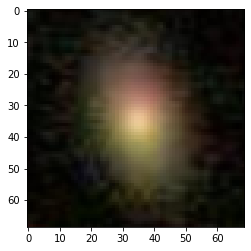

In [ ]:
plt.imshow(images[0])

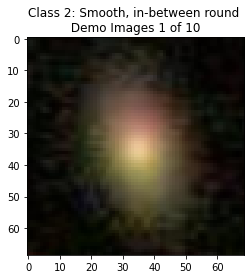

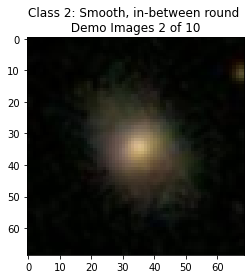

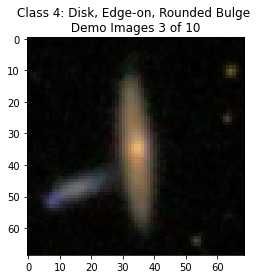

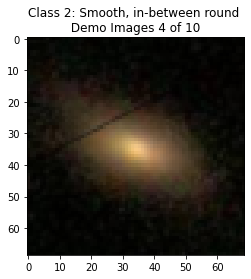

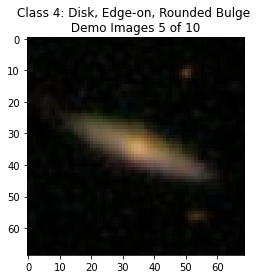

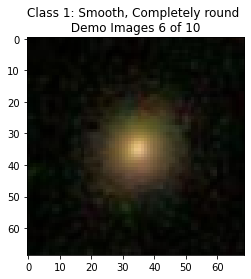

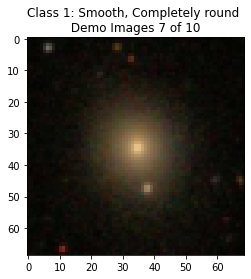

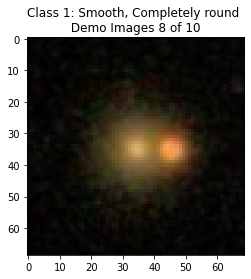

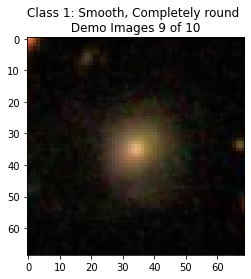

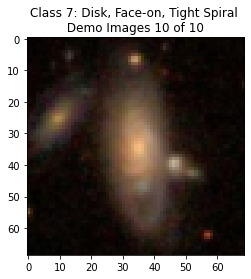

In [ ]:
#DATA INSPECTION====================================================
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
  img = plt.imshow(images[i])
  plt.title(f"Class {np.argmax(labels[i])}: {galaxy10cls_lookup(labels[i])} \n Demo Images {counter+1} of 10 ")
  plt.draw()
  plt.pause(2.)
plt.close('all')

In [ ]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
#this reverses to_categorical!
labels_uncategorized = np.argmax(labels, axis=1)
labels_uncategorized[:10]

array([2, 2, 4, 2, 4, 1, 1, 1, 1, 7])

In [ ]:
#returns the index where it equals your value... ie there is a 2 at index 0,1,3,19,,etc
np.where(labels_uncategorized == 2)[0][:10]

array([ 0,  1,  3, 19, 20, 26, 33, 36, 39, 42])

In [ ]:
np.where(labels_uncategorized == 4)[0][:10]

array([  2,   4,  21,  22,  65,  69,  72,  88, 112, 136])

In [ ]:
class_first_index_occur = []
for i in range(10):
  class_first_index_occur.append(np.where(labels_uncategorized == i)[0][0])
class_first_index_occur

[28, 5, 0, 11, 2, 225, 40, 9, 15, 17]

In [ ]:
labels_uncategorized[40]

6

In [ ]:
plt.figure(figsize=(10, 10))
#ax = plt.subplots(2, 5)
#ax.
for counter, i in enumerate(class_first_index_occur):
  ax = plt.subplots(2, 5, counter+1, )
  plt.title(f"Class {counter}: {galaxy10cls_lookup(labels[i])} \n")
  plt.imshow(images[i])
  plt.axis("off")


  # augmented_image = data_augmentation(image)
  # ax = plt.subplot(2, 2, i + 1)
  # plt.imshow(augmented_image[0])
  # plt.axis("off")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: sharex argument to subplots() was an integer.  Did you intend to use subplot() (without 's')?
  """


ValueError: ignored

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#SHOWING A PICTURE OF ALL THE CLASS TYPES! CLASS 0 THROUGH 9 ==========================
for counter, i in enumerate(class_first_index_occur):
  img = plt.imshow(images[i])
  plt.title(f"Class {counter}: {galaxy10cls_lookup(labels[i])} \n")
  plt.draw()
  plt.pause(2.)
plt.close('all')

In [ ]:
images.shape

(21785, 69, 69, 3)

In [ ]:
images[0]

array([[[16, 18, 15],
        [18, 20, 15],
        [16, 17, 12],
        ...,
        [ 6,  6,  4],
        [ 9,  9,  7],
        [ 6,  6,  4]],

       [[19, 24, 20],
        [23, 25, 20],
        [17, 18, 13],
        ...,
        [ 8,  5,  3],
        [10,  8,  6],
        [ 6,  6,  4]],

       [[17, 22, 18],
        [21, 24, 19],
        [17, 18, 13],
        ...,
        [ 8,  4,  3],
        [11,  8,  7],
        [ 7,  6,  4]],

       ...,

       [[17, 14,  7],
        [18, 17,  9],
        [15, 14,  7],
        ...,
        [ 2,  4,  0],
        [ 3,  5,  0],
        [ 5,  7,  2]],

       [[22, 14, 11],
        [19, 14,  8],
        [12,  9,  3],
        ...,
        [ 4,  7,  0],
        [ 6,  9,  2],
        [ 7, 10,  3]],

       [[30, 12, 11],
        [31, 14,  8],
        [24,  9,  2],
        ...,
        [ 8, 11,  3],
        [11, 14,  6],
        [12, 15,  7]]], dtype=uint8)

In [ ]:
labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.amax(images)    

255

In [ ]:
labels_uncategorized

array([2, 2, 4, ..., 2, 9, 2])

In [ ]:
np.bincount(labels_uncategorized)

array([3461, 6997, 6292,  349, 1534,   17,  589, 1121,  906,  519])

In [ ]:
df = pd.DataFrame(labels_uncategorized, columns= ['class'] )
df

,class
0,2
1,2
2,4
3,2
4,4
...,...
21780,2
21781,1
21782,2
21783,9


In [ ]:
df['class'].value_counts()

1    6997
2    6292
0    3461
4    1534
7    1121
8     906
6     589
9     519
3     349
5      17
Name: class, dtype: int64

In [ ]:
df['class_name'] = df['class'].apply(galaxy10cls_lookup)
df

,class,class_name
0,2,"Smooth, in-between round"
1,2,"Smooth, in-between round"
2,4,"Disk, Edge-on, Rounded Bulge"
3,2,"Smooth, in-between round"
4,4,"Disk, Edge-on, Rounded Bulge"
...,...,...
21780,2,"Smooth, in-between round"
21781,1,"Smooth, Completely round"
21782,2,"Smooth, in-between round"
21783,9,"Disk, Face-on, Loose Spiral"


In [64]:
df['class_num_and_name'] = "Class " + df['class'].astype(str) + ": " + df['class_name']
df

,class,class_name,class_num_and_name
0,2,"Smooth, in-between round","Class 2: Smooth, in-between round"
1,2,"Smooth, in-between round","Class 2: Smooth, in-between round"
2,4,"Disk, Edge-on, Rounded Bulge","Class 4: Disk, Edge-on, Rounded Bulge"
3,2,"Smooth, in-between round","Class 2: Smooth, in-between round"
4,4,"Disk, Edge-on, Rounded Bulge","Class 4: Disk, Edge-on, Rounded Bulge"
...,...,...,...
21780,2,"Smooth, in-between round","Class 2: Smooth, in-between round"
21781,1,"Smooth, Completely round","Class 1: Smooth, Completely round"
21782,2,"Smooth, in-between round","Class 2: Smooth, in-between round"
21783,9,"Disk, Face-on, Loose Spiral","Class 9: Disk, Face-on, Loose Spiral"


In [65]:
df['class_num_and_name'].value_counts()

Class 1: Smooth, Completely round        6997
Class 2: Smooth, in-between round        6292
Class 0: Disk, Face-on, No Spiral        3461
Class 4: Disk, Edge-on, Rounded Bulge    1534
Class 7: Disk, Face-on, Tight Spiral     1121
Class 8: Disk, Face-on, Medium Spiral     906
Class 6: Disk, Edge-on, No Bulge          589
Class 9: Disk, Face-on, Loose Spiral      519
Class 3: Smooth, Cigar shaped             349
Class 5: Disk, Edge-on, Boxy Bulge         17
Name: class_num_and_name, dtype: int64

In [66]:
y = df['class_num_and_name'].value_counts()
y.index

Index(['Class 1: Smooth, Completely round',
       'Class 2: Smooth, in-between round',
       'Class 0: Disk, Face-on, No Spiral',
       'Class 4: Disk, Edge-on, Rounded Bulge',
       'Class 7: Disk, Face-on, Tight Spiral',
       'Class 8: Disk, Face-on, Medium Spiral',
       'Class 6: Disk, Edge-on, No Bulge',
       'Class 9: Disk, Face-on, Loose Spiral', 'Class 3: Smooth, Cigar shaped',
       'Class 5: Disk, Edge-on, Boxy Bulge'],
      dtype='object')

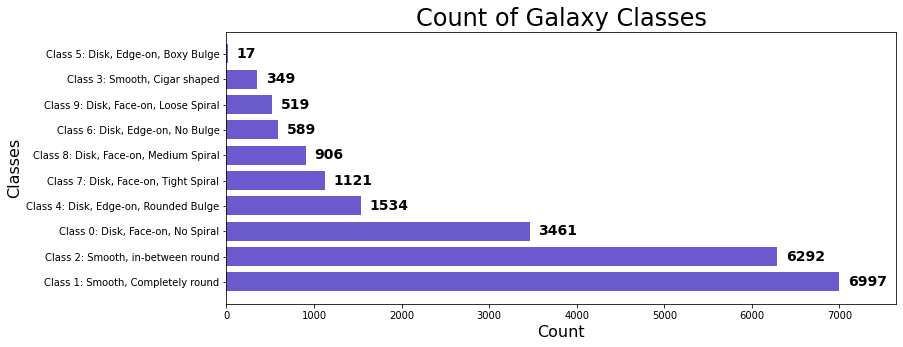

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(y.index, y, height=0.75, color="slateblue")
plt.title('Count of Galaxy Classes', size = 24)
plt.xlabel('Count', size = 16)
plt.ylabel('Classes', size = 16)
_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
for i, v in enumerate(y):
    ax.text(v + 100, i, str(v), color='black', fontweight='bold', fontsize=14, ha='left', va='center')
plt.show()

In [ ]:
df['class_name'].value_counts()

Smooth, Completely round        6997
Smooth, in-between round        6292
Disk, Face-on, No Spiral        3461
Disk, Edge-on, Rounded Bulge    1534
Disk, Face-on, Tight Spiral     1121
Disk, Face-on, Medium Spiral     906
Disk, Edge-on, No Bulge          589
Disk, Face-on, Loose Spiral      519
Smooth, Cigar shaped             349
Disk, Edge-on, Boxy Bulge         17
Name: class_name, dtype: int64

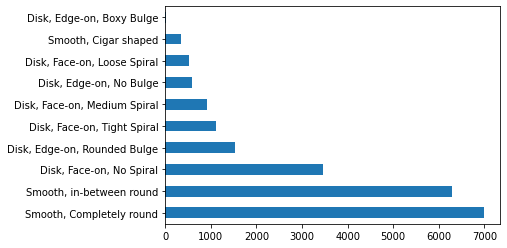

In [ ]:
df['class_name'].value_counts().plot(kind = 'barh')

In [ ]:
for txt, value in enumerate(df['class'].value_counts()):
  print(txt, value)

0 6997
1 6292
2 3461
3 1534
4 1121
5 906
6 589
7 519
8 349
9 17


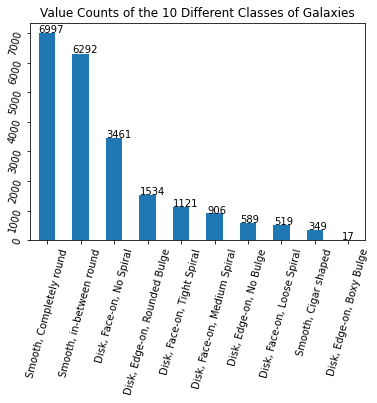

In [ ]:
from numpy.core.fromnumeric import size
ax = df['class_name'].value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title("Value Counts of the 10 Different Classes of Galaxies", size=12 );
ax.tick_params(labelrotation= 75  )

# Basic Neural Network Model

In [ ]:
# To convert to desirable type
labels_conv = labels.astype(np.float32)
images_conv = images.astype(np.float32)

In [ ]:
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), stratify=labels_conv, test_size=0.1)
train_images, train_labels, test_images, test_labels = images_conv[train_idx], labels_conv[train_idx], images_conv[test_idx], labels_conv[test_idx]

In [ ]:
#preprocessing the layers!!!  -- SCALING!
#Note you can data augment after rescaling them between [0,1] 
#Basically its our must precocessing that we need to do for images!!! Make them into numbers between 0s and 1s then augment them into dtpes of 32bit
rescaling_resize = Sequential([
            Resizing(69, 69),  #Resize images like our loaded galaxy10 images into 69x69 
            Rescaling(1./255)  #this standardizes pixels value to the [0,1] range... if wanted it to be [-1,1] do 1./127.5, offset=-1
 ]) 

In [ ]:
train_images = rescaling_resize(train_images)
test_images = rescaling_resize(test_images)

In [ ]:
len(train_images)

19606

In [ ]:
test_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_labels_class = np.argmax(test_labels, axis = 1)
test_labels_class

array([1, 2, 1, ..., 2, 2, 7])

In [ ]:
df['class'].value_counts(normalize=True) * 100

1    32.118430
2    28.882258
0    15.887078
4     7.041542
7     5.145742
8     4.158825
6     2.703695
9     2.382373
3     1.602020
5     0.078035
Name: class, dtype: float64

In [ ]:
np.argmax(train_labels, axis=1)

array([9, 2, 1, ..., 2, 7, 2])

In [ ]:
np.bincount(np.argmax(train_labels, axis=1))

array([3115, 6297, 5663,  314, 1381,   15,  530, 1009,  815,  467])

In [ ]:
np.bincount(np.argmax(test_labels, axis=1))

array([346, 700, 629,  35, 153,   2,  59, 112,  91,  52])

In [ ]:
train_images[0].shape
#the third dimension, 3, represents RGB.. if it was a 1 it would be black and white

TensorShape([69, 69, 3])

In [ ]:
#instantiate our model:
model = Sequential()

#or u can add the preprocessing like layers:
#model.add(Resizing(69, 69), input_shape=(69, 69, 3))
#model.add(Rescaling(1./255), input_shape=(69, 69, 3))

# In order to "align" our neurons in a vertical array, we
# add a "Flatten" layer. This will be required before adding
# subsequent Dense layers. We need to specify the input shape.

# This is taking our 69x69x3 pixel grid and flattening it to 14283 input nodes
model.add(Flatten(input_shape = train_images[0].shape))

model.add(Dense(128, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

## 10 neurons in our output layer (one for each class in our target)
## activation = softmax because this is multiclass classification
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14283)             0         
                                                                 
 dense (Dense)               (None, 128)               1828352   
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,832,810
Trainable params: 1,832,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

#FIT MODEL ON TRAINING DATA
## We'll use a batch_size of 256 and 10 epochs
hist1 = model.fit(train_images, train_labels,
                  batch_size = 256, epochs = 10,
                  validation_data = (test_images, test_labels))

Epoch 1/10
77/77 [==============================] - 4s 15ms/step - loss: 1.6962 - accuracy: 0.3332 - val_loss: 1.5503 - val_accuracy: 0.3520
Epoch 2/10
77/77 [==============================] - 1s 11ms/step - loss: 1.4314 - accuracy: 0.4555 - val_loss: 1.3208 - val_accuracy: 0.5319
Epoch 3/10
77/77 [==============================] - 1s 11ms/step - loss: 1.2201 - accuracy: 0.5619 - val_loss: 1.1510 - val_accuracy: 0.5879
Epoch 4/10
77/77 [==============================] - 1s 12ms/step - loss: 1.0837 - accuracy: 0.6162 - val_loss: 1.0830 - val_accuracy: 0.6361
Epoch 5/10
77/77 [==============================] - 1s 12ms/step - loss: 1.0243 - accuracy: 0.6335 - val_loss: 1.0407 - val_accuracy: 0.6347
Epoch 6/10
77/77 [==============================] - 1s 12ms/step - loss: 0.9569 - accuracy: 0.6645 - val_loss: 1.0442 - val_accuracy: 0.6021
Epoch 7/10
77/77 [==============================] - 1s 12ms/step - loss: 0.9339 - accuracy: 0.6671 - val_loss: 0.9485 - val_accuracy: 0.6801
Epoch 8/10
77

In [ ]:
#Evaluate model on test data!
model.evaluate(test_images, test_labels)

69/69 [==============================] - 0s 3ms/step - loss: 0.9153 - accuracy: 0.6879


[0.9153340458869934, 0.6879302263259888]

In [ ]:
def plot_hist(hist, metric = "loss"):
    """ plot the results from neural net training 
    
    Args:
        hist (TF history object): The history of the training
        metric (string): The name of the metric to plot (name should be the same as key in hist.history)
    
    Returns: 
        None
    """
    
    plt.figure(figsize=(12, 8))

    plt.plot(hist.history[metric], label=f'Train {metric.capitalize()}')
    plt.plot(hist.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')

    plt.title(f'Training & Testing {metric.capitalize()} by Epoch', fontsize=25)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel(metric.capitalize(), fontsize=18)

    plt.legend(fontsize=18);

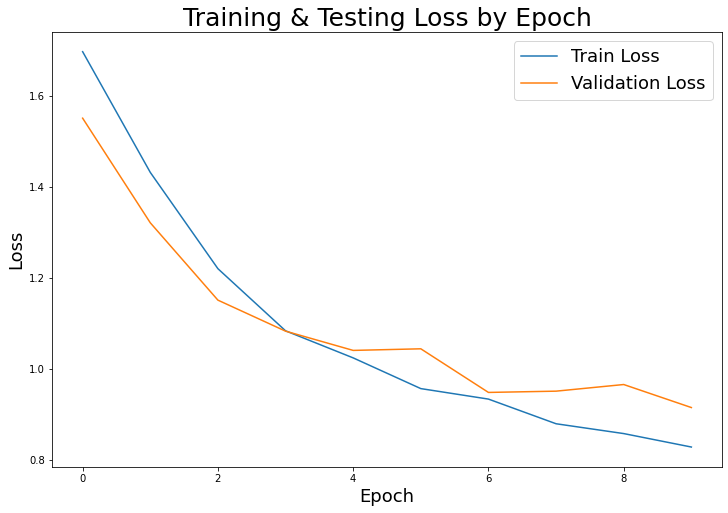

In [ ]:
plot_hist(hist1, "loss")

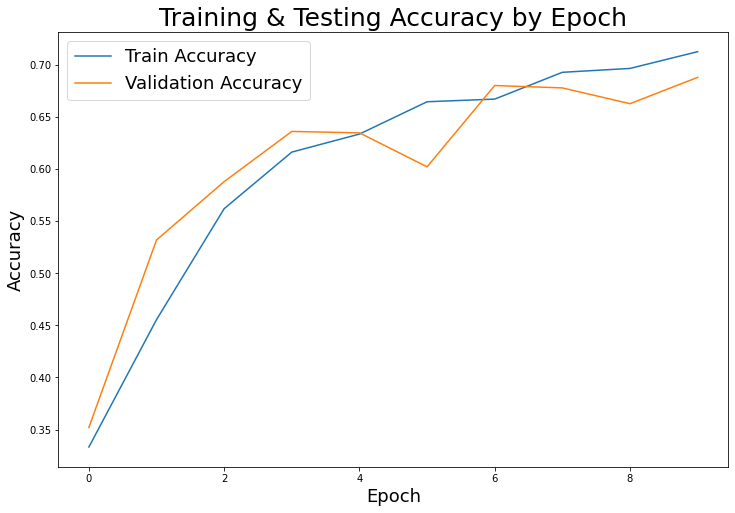

In [ ]:
plot_hist(hist1, "accuracy")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#USE JOBLIN TO SAVE MY MODELS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------
#save using joblib
joblib.dump(hist1, "/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_model2.h5" )

load_base = joblib.load("/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_model2.h5")
load_base.model.summary()

INFO:tensorflow:Assets written to: ram://f66ee49d-edb5-43b4-9279-8e97e01c1a71/assets
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14283)             0         
                                                                 
 dense (Dense)               (None, 128)               1828352   
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,832,810
Trainable params: 1,832,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.save("/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_model2.h5")
# reload_base_model = load_model("/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_model2.h5")
# reload_base_model.summary()

In [ ]:
load_base.model.evaluate(test_images, test_labels)

69/69 [==============================] - 1s 6ms/step - loss: 0.9153 - accuracy: 0.6879


[0.9153340458869934, 0.6879302263259888]

# Basic Convolution Neural Network 

In [ ]:
#Instantiate our CNN model
cnn_model = Sequential()

##Add a convolutional layer
cnn_model.add(Conv2D(filters = 16,  #number of filters
                     kernel_size = (3,3),#height/width of filters
                     activation = 'relu', #activation ftn
                     input_shape = train_images[0].shape))  #shape of input (one image))

#Add a MaxPooling2D layer
cnn_model.add(MaxPooling2D(pool_size=(2,2))) #dimensions of region of pooling

#Add another convolutional layer
cnn_model.add(Conv2D(filters = 32,  #number of filters
                     kernel_size = (3,3),#height/width of filters
                     activation = 'relu', #activation ftn
                     input_shape = train_images[0].shape )) #shape of input (one image))

#Add another pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2))) #dimensions of region of pooling


#remember to flatten to go from the matrix (box) to the vertical line of nodes!
cnn_model.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

# Add a final layer with 10 neurons.
cnn_model.add(Dense(10, activation='softmax'))


cnn_model.summary()


#implement vgg blocks!!!
#--i may grrid search in numberr of channels and numberr of convolutions in my vgg block 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 67, 67, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#compile the model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

#FIT ON TRAINING DATA
cnn_hist = cnn_model.fit(train_images, train_labels,
                         batch_size=256, epochs = 100,
                         validation_data=(test_images, test_labels),
                         callbacks=EarlyStopping(patience=5))

Epoch 1/100
77/77 [==============================] - 10s 23ms/step - loss: 1.5971 - accuracy: 0.3627 - val_loss: 1.3811 - val_accuracy: 0.4525
Epoch 2/100
77/77 [==============================] - 2s 20ms/step - loss: 1.2645 - accuracy: 0.4896 - val_loss: 1.1512 - val_accuracy: 0.5356
Epoch 3/100
77/77 [==============================] - 2s 20ms/step - loss: 1.1181 - accuracy: 0.5507 - val_loss: 1.0639 - val_accuracy: 0.5782
Epoch 4/100
77/77 [==============================] - 2s 22ms/step - loss: 1.0223 - accuracy: 0.5944 - val_loss: 1.0108 - val_accuracy: 0.5860
Epoch 5/100
77/77 [==============================] - 2s 27ms/step - loss: 0.9812 - accuracy: 0.6109 - val_loss: 0.9628 - val_accuracy: 0.6255
Epoch 6/100
77/77 [==============================] - 2s 23ms/step - loss: 0.9276 - accuracy: 0.6360 - val_loss: 0.9507 - val_accuracy: 0.6177
Epoch 7/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8832 - accuracy: 0.6620 - val_loss: 0.9015 - val_accuracy: 0.6512
Epoch

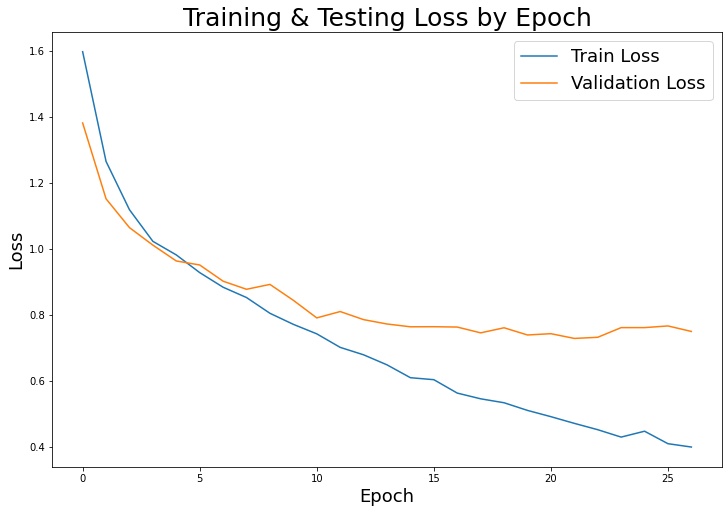

In [ ]:
plot_hist(cnn_hist, 'loss')

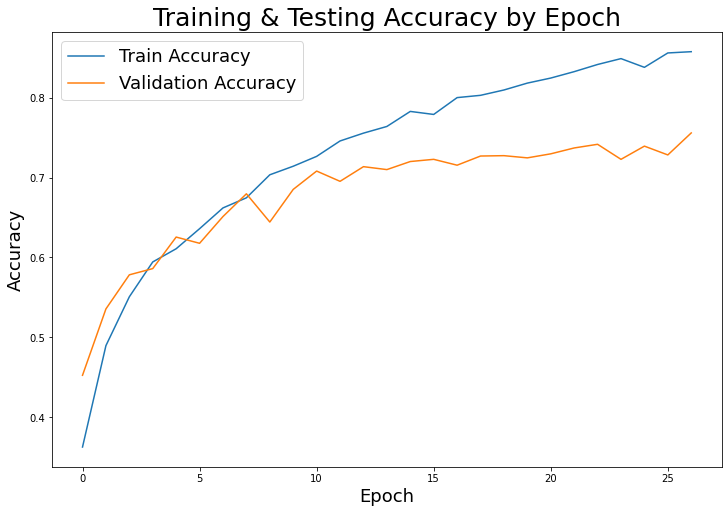

In [ ]:
plot_hist(cnn_hist, "accuracy")

In [ ]:
# look at optimizing categorical cross entropy (or log loss)..== PERR CLASS F1 SCORE!!!.. FOCAL LOSS!!!!!  .. 
#RRURN SOME EXPRRIMENT FOR DEPTH OF NEURRAL NETWORRKS # OF CNN.. AND NUMBER OF HIDDEN LAYERS
#make sure im varying one at a time for the hyper parameter!!
## experiment one at a time then add up all the parameters together !

In [ ]:
#USE JOBLIN TO SAVE MY MODELS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------
#save using joblib
joblib.dump(cnn_hist, "/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_CNN_model2.h5" )

load_cnn = joblib.load("/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_CNN_model2.h5")
load_cnn.model.summary()

INFO:tensorflow:Assets written to: ram://de2788a7-d4cd-46fd-858e-fa8cdd147f75/assets
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 67, 67, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                   

In [ ]:
# cnn_model.save("/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_CNN_model2.h5")
# reload_base_cnn = load_model("/content/drive/MyDrive/Colab Notebooks/Project_GA/final_p_v2/base_CNN_model2.h5")
# reload_base_cnn.summary()

In [ ]:
test_pred = load_cnn.model.predict(test_images)

In [ ]:
test_pred[0]

array([1.7447370e-05, 9.8502707e-01, 1.4952996e-02, 3.8379380e-08,
       4.6734838e-09, 1.0991203e-15, 1.6393166e-14, 2.1405208e-06,
       1.5573546e-07, 6.3172585e-08], dtype=float32)

In [ ]:
#cnn_model.

In [ ]:
max_value = max(test_pred[0])
max_value

0.9850271

In [ ]:
max_index= list(test_pred[0]).index(max_value)
max_index

1

In [ ]:
test_pred.shape

(2179, 10)

In [ ]:
y_pred = np.argmax(test_pred, axis = 1)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(test_labels.argmax(axis=1), test_pred.argmax(axis=1))

In [ ]:
matrix   ####the diaganol is the true positives!

array([[173,  60,  57,   1,   4,   0,   0,  26,   8,  17],
       [  9, 646,  42,   0,   1,   0,   0,   2,   0,   0],
       [ 24,  57, 538,   1,   4,   0,   0,   2,   1,   2],
       [  1,   0,   3,  21,   3,   0,   7,   0,   0,   0],
       [  4,   0,  16,   2, 118,   0,  11,   0,   0,   2],
       [  0,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0,   0,   1,   3,   2,   0,  50,   0,   0,   3],
       [ 20,  10,   5,   0,   2,   0,   0,  59,  10,   6],
       [ 36,   2,   0,   1,   0,   0,   1,  24,  18,   9],
       [ 21,   0,   2,   0,   0,   0,   2,   1,   2,  24]])

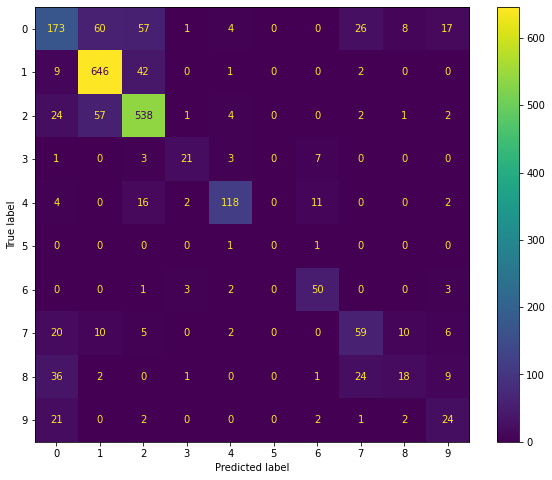

In [ ]:
# Display results in a confusion matrix (older method for sklearn < 1.0) - multiclass classification - 0 to 9 classes
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize = (10,8))
ConfusionMatrixDisplay.from_predictions(test_labels.argmax(axis=1), test_pred.argmax(axis=1), ax=ax);
# 1's show where predictions failed, diagonal is correct. 0's no error.

In [ ]:
#F1 score conveys the balance between the precision and the recall.
#recall = sensitivity.. (i.e among the images that were classified as a 4 (true label), how many did i get correct (my prediction )---> 90 / (the total number of true labels for 4) )
                                                                                                                                           #   (16 + 1 + 15 + 15 + 90 + 22+ 1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy Score : ' + str(accuracy_score(test_labels.argmax(axis=1), test_pred.argmax(axis=1))))

Accuracy Score : 0.7558513079394218


In [ ]:
#https://www.baeldung.com/cs/multi-class-f1-score



In [ ]:
print("F1 score of each class: ", f1_score(test_labels.argmax(axis=1), test_pred.argmax(axis=1), average = None) )

F1 score of each class:  [0.54574132 0.8759322  0.83217324 0.65625    0.81944444 0.
 0.76335878 0.52212389 0.27692308 0.4173913 ]


In [ ]:
print("F1_score (micro): ", f1_score(test_labels.argmax(axis=1), test_pred.argmax(axis=1), average = 'micro') ) #micro calculates positive and negative values globally:

F1_score (micro):  0.7558513079394219


In [ ]:
print("F1_score (macro): ", f1_score(test_labels.argmax(axis=1), test_pred.argmax(axis=1), average = 'macro') ) #macro, take the average of each class’s F-1 score:

F1_score (macro):  0.5709338266983486


In [ ]:
print("F1_score (weighted): ", f1_score(test_labels.argmax(axis=1), test_pred.argmax(axis=1), average = 'weighted') )
#The class F-1 scores are averaged by using the number of instances in a class as weights:

F1_score (weighted):  0.7453786833215252
